<a href="https://colab.research.google.com/github/JJJavier23/DeepLearning/blob/main/hyperparametersPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import sys
from packaging import version
import sklearn
import numpy as np
import tensorflow as tf

## Building a Regression MLP Using the Sequential API

Let’s use the California housing problem and build a neural network with 3 hidden layers composed of 50 neurons each.
The output layer has a single neuron (since we only want to predict a single value) and it uses no activation function, the loss function is the mean squared error, the metric is the RMSE, and we’re using an Adam optimizer.

Let's load, split and scale the California housing dataset:

In [ ]:
# load and split the California housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - RootMeanSquaredError: 1.3803 - loss: 2.0759 - val_RootMeanSquaredError: 0.7926 - val_loss: 0.6282
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6474 - loss: 0.4198 - val_RootMeanSquaredError: 1.0416 - val_loss: 1.0849
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6201 - loss: 0.3848 - val_RootMeanSquaredError: 0.9563 - val_loss: 0.9145
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6072 - loss: 0.3691 - val_RootMeanSquaredError: 0.9815 - val_loss: 0.9633
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5993 - loss: 0.3595 - val_RootMeanSquaredError: 1.1736 - val_loss: 1.3774
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5910 - loss: 0.3495 - val_RootMeanSquaredError: 0.6631 - val_loss: 0.4397
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5784 - lo

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [ ]:
y_pred

array([[0.44746593],
       [1.2418519 ],
       [4.8894796 ]], dtype=float32)

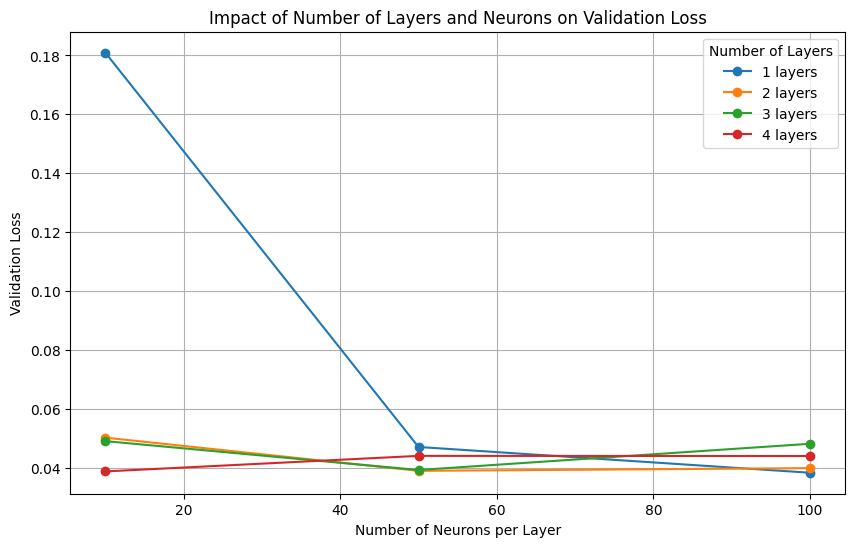

In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, MinMaxScaler

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1, 1)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

def build_and_train_model(layers, neurons):
    model = tf.keras.Sequential()
    for _ in range(layers):
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["RootMeanSquaredError"])

    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
    return history

layer_options = [1, 2, 3, 4]
neuron_options = [10, 50, 100]
results = {}

for layers in layer_options:
    for neurons in neuron_options:
        history = build_and_train_model(layers, neurons)
        results[(layers, neurons)] = history.history['val_loss'][-1]

fig, visual = plt.subplots(figsize=(10, 6))
for layers in layer_options:
    val_losses = [results[(layers, neurons)] for neurons in neuron_options]
    visual.plot(neuron_options, val_losses, label=f'{layers} layers', marker='o')

visual.set_title('Impact of Number of Layers and Neurons on Validation Loss')
visual.set_xlabel('Number of Neurons per Layer')
visual.set_ylabel('Validation Loss')
visual.legend(title='Number of Layers')
plt.grid(True)
plt.show()
